In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
import pandas as pd
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\big data 1\big data 1\big data\modified.csv")
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,192.168.180.37-10.200.7.9-2187-3128-6,10.200.7.9,3128,192.168.180.37,2187,6,26/04/201711:11:51,198,5,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
6177,207.244.80.182-10.200.7.199-443-47219-6,10.200.7.199,47219,207.244.80.182,443,6,26/04/201711:11:50,294435,18,7,...,0.0,0,0,0.0,0.0,0,0,BENIGN,91,SSL
6178,192.168.180.37-10.200.7.9-2187-3128-6,192.168.180.37,2187,10.200.7.9,3128,6,26/04/201711:11:51,14,1,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,130,HTTP_CONNECT
6179,192.168.180.37-10.200.7.9-2187-3128-6,10.200.7.9,3128,192.168.180.37,2187,6,26/04/201711:11:51,258,2,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP


Number of Unique Application Names:  21


Text(0, 0.5, 'Frequency')

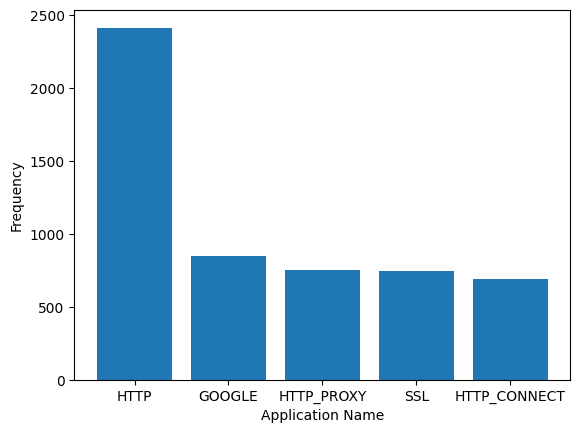

In [6]:
import matplotlib.pyplot as plt
freq_protocol = data['ProtocolName'].value_counts()
# sns.histplot(freq_protocol.values())
application_name = []
frequency_count = []
for key, value in freq_protocol.items():
    application_name.append(key)
    frequency_count.append(value)

print("Number of Unique Application Names: ", len(freq_protocol))

# graph of top 5 application names
top_values = 5
plt.bar(application_name[:top_values], frequency_count[:top_values])
plt.xlabel("Application Name")
plt.ylabel("Frequency")

In [7]:
requiredProtocolName = []
for key, value in freq_protocol.items():
    if (value >= 10000):
        requiredProtocolName.append(key)

print(requiredProtocolName)

[]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
encoder = LabelEncoder().fit(data['ProtocolName'])
data['ProtocolName'] = encoder.transform(data['ProtocolName'])
values = encoder.inverse_transform(data['ProtocolName'])
target_column = data['ProtocolName']

# mapping the encoded value
encoded_target_column = {}
for i in range(len(data['ProtocolName'])):
    encoded_target_column[data['ProtocolName'][i]] = values[i]

print(encoded_target_column)

{8: 'HTTP_PROXY', 6: 'HTTP', 7: 'HTTP_CONNECT', 14: 'SSL', 5: 'GOOGLE', 20: 'YOUTUBE', 3: 'FACEBOOK', 1: 'CONTENT_FLASH', 2: 'DROPBOX', 18: 'WINDOWS_UPDATE', 0: 'AMAZON', 9: 'MICROSOFT', 16: 'TOR', 4: 'GMAIL', 19: 'YAHOO', 10: 'MSN', 15: 'SSL_NO_CERT', 13: 'SKYPE', 12: 'MS_ONE_DRIVE', 11: 'MSSQL', 17: 'TWITTER'}


In [9]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = data.drop(['Flow.ID','Source.IP','Label', 'Timestamp','Destination.IP', 'Source.Port', 'Destination.Port', 'Protocol'], axis=1)

x_dataset = dataset.drop(['ProtocolName'], axis = 1)
y_dataset = dataset['ProtocolName']

# normal dataset
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
final_result = {'Random Forest': {'Original': 0}, 'Decision Tree': {'Original': 0},'KNN':{'Original':0},'Logistic Regression':{'Orginal':0},'MLP':{'Orginal':0}}
f1Scores ={'Random Forest': {'Original': 0}, 'Decision Tree': {'Original': 0},'KNN':{'Original':0},'Logistic Regression':{'Orginal':0},'MLP':{'Orginal':0}}
numberOfFeatures = {'Random Forest': {'Original': 0}, 'Decision Tree': {'Original': 0},'KNN':{'Original':0},'Logistic Regression':{'Orginal':0},'MLP':{'Orginal':0}}

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

sc = StandardScaler()

In [13]:
def random_forest_classifier(feature_train, target_train):
    randomForest = RandomForestClassifier(n_estimators=200)
    randomForest.fit(feature_train, target_train)

    return randomForest
randomForest = random_forest_classifier(X_train, y_train)
predictions = randomForest.predict(X_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Decision Tree model
decisionTreeNormal = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
decisionTreeNormal.fit(X_train, y_train)

# Predict on the test set
target_pred = decisionTreeNormal.predict(X_test)

# Calculate accuracy
accuracy = decisionTreeNormal.score(X_test, y_test)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f"Accuracy in Decision Tree on Original Dataset: {accuracy_percentage:.2f}%")

# Store results
final_result['Decision Tree']['Original'] = accuracy
f1Scores['Decision Tree']['Original'] = f1_score(y_test, target_pred, average='micro')
numberOfFeatures['Decision Tree']['Original'] = X_train.shape[1]

# Compute precision, recall, and F1 score averaged across all classes
precision = precision_score(y_test, target_pred, average='macro', zero_division=0)
recall = recall_score(y_test, target_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, target_pred, average='macro', zero_division=0)

# Print all metrics as percentages
print(f'Precision with Decision Tree on Original Dataset: {precision * 100:.2f}%')
print(f'Recall with Decision Tree on Original Dataset: {recall * 100:.2f}%')
print(f'F1 Score with Decision Tree on Original Dataset: {f1 * 100:.2f}%')


Accuracy in Decision Tree on Original Dataset: 93.86%
Precision with Decision Tree on Original Dataset: 34.01%
Recall with Decision Tree on Original Dataset: 38.89%
F1 Score with Decision Tree on Original Dataset: 35.94%


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Random Forest model
randomForest = random_forest_classifier(X_train, y_train)
predictions = randomForest.predict(X_test)

# Calculate accuracy
accuracy = randomForest.score(X_test, y_test)
accuracy_percentage = accuracy * 100  # Convert to percentage
print(f'Accuracy with Random Forest on Original Dataset: {accuracy_percentage:.2f}%')

# Store results
final_result['Random Forest']['Original'] = accuracy
f1Scores['Random Forest']['Original'] = f1_score(y_test, predictions, average='micro')
numberOfFeatures['Random Forest']['Original'] = X_train.shape[1]

# Compute precision, recall, and F1 score averaged across all classes
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro', zero_division=0)
f1 = f1_score(y_test, predictions, average='macro', zero_division=0)

# Print all metrics as percentages
print(f'Precision with Random Forest on Original Dataset: {precision * 100:.2f}%')
print(f'Recall with Random Forest on Original Dataset: {recall * 100:.2f}%')
print(f'F1 Score with Random Forest on Original Dataset: {f1 * 100:.2f}%')


Accuracy with Random Forest on Original Dataset: 95.07%
Precision with Random Forest on Original Dataset: 80.26%
Recall with Random Forest on Original Dataset: 60.52%
F1 Score with Random Forest on Original Dataset: 64.92%


In [37]:
features_df = pd.DataFrame(numberOfFeatures)
print("Number of Features for each model and algorithm")
features_df

Number of Features for each model and algorithm


,Random Forest,Decision Tree,KNN,Logistic Regression,MLP
Original,78,78,78,78,78


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust 'k' as needed

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = knn_classifier.score(X_test, y_test)
accuracy_percentage = accuracy_knn * 100  # Convert to percentage
print(f'Accuracy with KNN on Original Dataset: {accuracy_percentage:.2f}%')

# Update results dictionary
final_result['KNN']['Original'] = accuracy_knn
f1Scores['KNN']['Original'] = f1_score(y_test, knn_predictions, average='macro')
numberOfFeatures['KNN']['Original'] = X_train.shape[1]

# Calculate precision, recall, and F1 score
precision_knn = precision_score(y_test, knn_predictions, average='macro')
recall_knn = recall_score(y_test, knn_predictions, average='macro')
f1_knn = f1_score(y_test, knn_predictions, average='macro')

# Print all values in percentage
print(f'Precision with KNN on Original Dataset: {precision_knn * 100:.2f}%')
print(f'Recall with KNN on Original Dataset: {recall_knn * 100:.2f}%')
print(f'F1 Score with KNN on Original Dataset: {f1_knn * 100:.2f}%')


Accuracy with KNN on Original Dataset: 79.71%
Precision with KNN on Original Dataset: 48.55%
Recall with KNN on Original Dataset: 43.41%
F1 Score with KNN on Original Dataset: 45.02%


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Create Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Train the classifier
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

# Evaluate the model
accuracy = logistic_regression_classifier.score(X_test, y_test)
print(f'Accuracy with Logistic Regression on Original Dataset: {accuracy * 100:.2f}%')

# Update results dictionary
final_result['Logistic Regression']['Original'] = accuracy
f1Scores['Logistic Regression']['Original'] = f1_score(y_test, logistic_regression_predictions, average='macro')
numberOfFeatures['Logistic Regression']['Original'] = X_train.shape[1]

# Calculate precision, recall, and F1 score
precision_lr = precision_score(y_test, logistic_regression_predictions, average='macro', zero_division=0)
recall_lr = recall_score(y_test, logistic_regression_predictions, average='macro', zero_division=0)
f1_lr = f1_score(y_test, logistic_regression_predictions, average='macro', zero_division=0)

# Output all metrics in percentage
print(f'Precision with Logistic Regression on Original Dataset: {precision_lr * 100:.2f}%')
print(f'Recall with Logistic Regression on Original Dataset: {recall_lr * 100:.2f}%')
print(f'F1 Score with Logistic Regression on Original Dataset: {f1_lr * 100:.2f}%')


Accuracy with Logistic Regression on Original Dataset: 83.51%
Precision with Logistic Regression on Original Dataset: 43.81%
Recall with Logistic Regression on Original Dataset: 39.90%
F1 Score with Logistic Regression on Original Dataset: 40.19%


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Create MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)  # You can adjust hidden_layer_sizes and max_iter as needed

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = mlp_classifier.score(X_test, y_test)
print(f'Accuracy with MLP on Original Dataset: {accuracy * 100:.2f}%')

# Update results dictionary
final_result['MLP']['Original'] = accuracy
f1Scores['MLP']['Original'] = f1_score(y_test, mlp_predictions, average='macro')
numberOfFeatures['MLP']['Original'] = X_train.shape[1]

# Calculate precision, recall, and F1 score
precision_mlp = precision_score(y_test, mlp_predictions, average='macro', zero_division=0)
recall_mlp = recall_score(y_test, mlp_predictions, average='macro', zero_division=0)
f1_mlp = f1_score(y_test, mlp_predictions, average='macro', zero_division=0)

# Output all metrics in percentage
print(f'Precision with MLP on Original Dataset: {precision_mlp * 100:.2f}%')
print(f'Recall with MLP on Original Dataset: {recall_mlp * 100:.2f}%')
print(f'F1 Score with MLP on Original Dataset: {f1_mlp * 100:.2f}%')


Accuracy with MLP on Original Dataset: 92.72%
Precision with MLP on Original Dataset: 78.75%
Recall with MLP on Original Dataset: 64.47%
F1 Score with MLP on Original Dataset: 68.05%
